In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import re

In [2]:
all_teams = ['POR','OKC','UTA','MIN','DEN','GSW','LAC','LAL','SAC','PHO','HOU','NOP','SAS','DAL','MEM',
             'TOR','BOS','PHI','NYK','BRK','CLE','IND','MIL','DET','CHI','MIA','WAS','CHO','ORL','ATL']

In [3]:
players = []
for team in all_teams:
    team_url = 'https://www.basketball-reference.com/teams/'+team+'/2018.html'
    res = requests.get(team_url).content.decode('utf-8')
    clean_soup = BeautifulSoup(re.sub("<!--|-->","",res), 'lxml')
    table = clean_soup.find('table', {'id': 'per_poss'})
    table = table.find('tbody')
    
    for row in table.find_all('tr'):
        player = {}
        player['Name'] = row.find('td').text
        player['Age'] = row.find('td', {'class': 'center'}).text
        player['Games'] = row.find('td', {'class': 'right', 'data-stat': 'g'}).text
        player['GS'] = row.find('td', {'class': 'right', 'data-stat': 'gs'}).text
        player['MP'] = row.find('td', {'class': 'right', 'data-stat': 'mp'}).text
        player['FG'] = row.find('td', {'class': 'right', 'data-stat': 'fg_per_poss'}).text
        player['FGA'] = row.find('td', {'class': 'right', 'data-stat': 'fga_per_poss'}).text
        player['FG%'] = row.find('td', {'class': 'right', 'data-stat': 'fg_pct'}).text
        player['3P'] = row.find('td', {'class': 'right', 'data-stat': 'fg3_per_poss'}).text
        player['3PA'] = row.find('td', {'class': 'right', 'data-stat': 'fg3a_per_poss'}).text
        player['3P%'] = row.find('td', {'class': 'right', 'data-stat': 'fg3_pct'}).text
        player['2P'] = row.find('td', {'class': 'right', 'data-stat': 'fg2_per_poss'}).text
        player['2PA'] = row.find('td', {'class': 'right', 'data-stat': 'fg2a_per_poss'}).text
        player['2P%'] = row.find('td', {'class': 'right', 'data-stat': 'fg2_pct'}).text
        player['FT'] = row.find('td', {'class': 'right', 'data-stat': 'ft_per_poss'}).text
        player['FTA'] = row.find('td', {'class': 'right', 'data-stat': 'fta_per_poss'}).text
        player['FT%'] = row.find('td', {'class': 'right', 'data-stat': 'ft_pct'}).text
        player['ORB'] = row.find('td', {'class': 'right', 'data-stat': 'orb_per_poss'}).text
        player['DRB'] = row.find('td', {'class': 'right', 'data-stat': 'drb_per_poss'}).text
        player['TRB'] = row.find('td', {'class': 'right', 'data-stat': 'trb_per_poss'}).text
        player['AST'] = row.find('td', {'class': 'right', 'data-stat': 'ast_per_poss'}).text
        player['STL'] = row.find('td', {'class': 'right', 'data-stat': 'stl_per_poss'}).text
        player['BLK'] = row.find('td', {'class': 'right', 'data-stat': 'blk_per_poss'}).text
        player['TOV'] = row.find('td', {'class': 'right', 'data-stat': 'tov_per_poss'}).text
        player['PF'] = row.find('td', {'class': 'right', 'data-stat': 'pf_per_poss'}).text
        player['PTS'] = row.find('td', {'class': 'right', 'data-stat': 'pts_per_poss'}).text
        player['ORtg'] = row.find('td', {'class': 'right', 'data-stat': 'off_rtg'}).text
        player['DRtg'] = row.find('td', {'class': 'right', 'data-stat': 'def_rtg'}).text
        
        players.append(player)
pd.DataFrame(players)

,2P,2P%,2PA,3P,3P%,3PA,AST,Age,BLK,DRB,...,Games,MP,Name,ORB,ORtg,PF,PTS,STL,TOV,TRB
0,8.1,.465,17.5,3.2,.397,8.1,4.6,26,0.6,4.6,...,81,2923,CJ McCollum,0.9,108,2.9,29.5,1.3,2.6,5.5
1,7.3,.501,14.6,4.2,.361,11.7,9.0,27,0.5,4.9,...,73,2670,Damian Lillard,1.2,120,2.2,36.6,1.4,3.8,6.1
2,11.4,.508,22.5,0.0,.000,0.2,3.4,23,2.6,12.4,...,79,2088,Jusuf Nurkic,4.5,102,5.9,27.0,1.5,4.4,16.9
3,2.5,.432,5.8,3.0,.369,8.1,2.0,27,1.0,10.3,...,69,2072,Al-Farouq Aminu,2.3,105,3.3,15.5,1.9,1.9,12.6
4,5.3,.485,10.9,1.0,.318,3.2,4.2,29,0.7,5.2,...,79,2034,Evan Turner,0.7,103,4.0,15.9,1.1,2.4,6.0
5,4.6,.450,10.1,2.7,.376,7.1,4.9,26,0.5,4.7,...,74,1535,Shabazz Napier,0.8,107,2.7,20.9,2.6,2.9,5.5
6,3.0,.506,6.0,2.5,.352,7.0,3.0,25,0.7,4.2,...,82,1488,Pat Connaughton,1.2,110,4.0,14.7,0.8,1.4,5.4
7,5.7,.584,9.8,0.0,.000,0.0,1.4,28,1.8,13.3,...,78,1471,Ed Davis,6.2,121,6.4,14.0,1.1,2.2,19.4
8,3.9,.547,7.0,1.9,.415,4.6,2.1,24,1.7,4.6,...,59,1264,Maurice Harkless,1.8,117,4.1,15.2,1.9,1.6,6.4
9,3.8,.455,8.4,1.7,.310,5.4,2.5,20,1.5,8.4,...,66,1045,Zach Collins,2.1,93,6.3,13.9,0.8,2.8,10.5


In [ ]:
player['EFG%'] = row.find('td', {'class': 'right', 'data-stat': 'efg_pct'}).text

In [4]:
per_poss100_17_18 = pd.DataFrame(players)

In [5]:
per_poss100_17_18.shape

(605, 28)

In [15]:
per_poss100_17_18.info()

<class 'pandas.core.frame.DataFrame'>
Index: 605 entries, CJ McCollum to Jeremy Evans
Data columns (total 27 columns):
2P       605 non-null float64
2P%      588 non-null float64
2PA      605 non-null float64
3P       605 non-null float64
3P%      545 non-null float64
3PA      605 non-null float64
AST      605 non-null float64
Age      605 non-null float64
BLK      605 non-null float64
DRB      605 non-null float64
DRtg     605 non-null float64
FG       605 non-null float64
FG%      601 non-null float64
FGA      605 non-null float64
FT       605 non-null float64
FT%      550 non-null float64
FTA      605 non-null float64
GS       605 non-null float64
Games    605 non-null float64
MP       605 non-null float64
ORB      605 non-null float64
ORtg     603 non-null float64
PF       605 non-null float64
PTS      605 non-null float64
STL      605 non-null float64
TOV      605 non-null float64
TRB      605 non-null float64
dtypes: float64(27)
memory usage: 132.3+ KB


In [7]:
per_poss100_17_18.set_index('Name', inplace=True)

In [17]:
per_poss100_17_18.isnull().sum()

2P       0
2P%      0
2PA      0
3P       0
3P%      0
3PA      0
AST      0
Age      0
BLK      0
DRB      0
DRtg     0
FG       0
FG%      0
FGA      0
FT       0
FT%      0
FTA      0
GS       0
Games    0
MP       0
ORB      0
ORtg     0
PF       0
PTS      0
STL      0
TOV      0
TRB      0
dtype: int64

In [11]:
per_poss100_17_18 = per_poss100_17_18.replace('', np.nan) # changing the strings to nan

In [13]:
per_poss100_17_18['2P'] = per_poss100_17_18['2P'].astype(float)
per_poss100_17_18['2P%'] = per_poss100_17_18['2P%'].astype(float)
per_poss100_17_18['2PA'] = per_poss100_17_18['2PA'].astype(float)
per_poss100_17_18['3P'] = per_poss100_17_18['3P'].astype(float)
per_poss100_17_18['3P%'] = per_poss100_17_18['3P%'].astype(float)
per_poss100_17_18['3PA'] = per_poss100_17_18['3PA'].astype(float)
per_poss100_17_18['AST'] = per_poss100_17_18['AST'].astype(float)
per_poss100_17_18['Age'] = per_poss100_17_18['Age'].astype(float)
per_poss100_17_18['BLK'] = per_poss100_17_18['BLK'].astype(float)
per_poss100_17_18['DRB'] = per_poss100_17_18['DRB'].astype(float)
per_poss100_17_18['FG'] = per_poss100_17_18['FG'].astype(float)
per_poss100_17_18['FG%'] = per_poss100_17_18['FG%'].astype(float)
per_poss100_17_18['FGA'] = per_poss100_17_18['FGA'].astype(float)
per_poss100_17_18['FT'] = per_poss100_17_18['FT'].astype(float)
per_poss100_17_18['FT%'] = per_poss100_17_18['FT%'].astype(float)
per_poss100_17_18['FTA'] = per_poss100_17_18['FTA'].astype(float)
per_poss100_17_18['GS'] = per_poss100_17_18['GS'].astype(float)
per_poss100_17_18['Games'] = per_poss100_17_18['Games'].astype(float)
per_poss100_17_18['MP'] = per_poss100_17_18['MP'].astype(float)
per_poss100_17_18['ORB'] = per_poss100_17_18['ORB'].astype(float)
per_poss100_17_18['PF'] = per_poss100_17_18['PF'].astype(float)
per_poss100_17_18['PTS'] = per_poss100_17_18['PTS'].astype(float)
per_poss100_17_18['STL'] = per_poss100_17_18['STL'].astype(float)
per_poss100_17_18['TOV'] = per_poss100_17_18['TOV'].astype(float)
per_poss100_17_18['TRB'] = per_poss100_17_18['TRB'].astype(float)
per_poss100_17_18['ORtg'] = per_poss100_17_18['ORtg'].astype(float)
per_poss100_17_18['DRtg'] = per_poss100_17_18['DRtg'].astype(float)

In [16]:
per_poss100_17_18.replace(np.nan, 0, inplace =True) ## changing nan to 0

In [19]:
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 700) # want to see more rows and columns

In [20]:
per_poss100_17_18.head()

,2P,2P%,2PA,3P,3P%,3PA,AST,Age,BLK,DRB,DRtg,FG,FG%,FGA,FT,FT%,FTA,GS,Games,MP,ORB,ORtg,PF,PTS,STL,TOV,TRB
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,
CJ McCollum,8.1,0.465,17.5,3.2,0.397,8.1,4.6,26.0,0.6,4.6,109.0,11.4,0.443,25.6,3.6,0.836,4.3,81.0,81.0,2923.0,0.9,108.0,2.9,29.5,1.3,2.6,5.5
Damian Lillard,7.3,0.501,14.6,4.2,0.361,11.7,9.0,27.0,0.5,4.9,109.0,11.6,0.439,26.4,9.2,0.916,10.0,73.0,73.0,2670.0,1.2,120.0,2.2,36.6,1.4,3.8,6.1
Jusuf Nurkic,11.4,0.508,22.5,0.0,0.000,0.2,3.4,23.0,2.6,12.4,101.0,11.4,0.505,22.7,4.1,0.630,6.5,79.0,79.0,2088.0,4.5,102.0,5.9,27.0,1.5,4.4,16.9
Al-Farouq Aminu,2.5,0.432,5.8,3.0,0.369,8.1,2.0,27.0,1.0,10.3,104.0,5.5,0.395,14.0,1.4,0.738,1.9,67.0,69.0,2072.0,2.3,105.0,3.3,15.5,1.9,1.9,12.6
Evan Turner,5.3,0.485,10.9,1.0,0.318,3.2,4.2,29.0,0.7,5.2,109.0,6.3,0.447,14.1,2.2,0.850,2.6,40.0,79.0,2034.0,0.7,103.0,4.0,15.9,1.1,2.4,6.0


In [21]:
per_poss100_17_18.corr()

,2P,2P%,2PA,3P,3P%,3PA,AST,Age,BLK,DRB,DRtg,FG,FG%,FGA,FT,FT%,FTA,GS,Games,MP,ORB,ORtg,PF,PTS,STL,TOV,TRB
2P,1.000000,0.536289,0.844424,-0.251043,-0.178794,-0.367269,0.095007,-0.050402,0.313790,0.360873,-0.269012,0.684901,0.546822,0.499392,0.363466,0.077870,0.411494,0.264771,0.168529,0.230206,0.439447,0.255451,0.162989,0.516055,0.079362,0.340136,0.452776
2P%,0.536289,1.000000,0.210325,-0.207984,-0.099059,-0.235688,-0.018125,0.036892,0.250794,0.162826,-0.193336,0.312032,0.650145,0.007324,0.103983,0.208551,0.133107,0.149765,0.235910,0.190887,0.259641,0.381540,0.120400,0.194769,0.077333,0.094318,0.229283
2PA,0.844424,0.210325,1.000000,-0.249007,-0.167471,-0.359550,0.159464,-0.056235,0.217677,0.255233,-0.141727,0.550472,0.243874,0.652675,0.367778,0.063743,0.408654,0.235168,0.104315,0.188883,0.369822,0.017589,0.050367,0.419348,0.033067,0.365208,0.344935
3P,-0.251043,-0.207984,-0.249007,1.000000,0.569943,0.728711,0.035206,0.045273,-0.208636,-0.249776,0.199118,0.533247,0.175190,0.356466,0.030219,0.080415,-0.050625,0.061883,0.045200,0.098883,-0.327018,0.380294,-0.207744,0.672985,-0.105534,-0.046048,-0.323055
3P%,-0.178794,-0.099059,-0.167471,0.569943,1.000000,0.405448,0.169194,0.043754,-0.186318,-0.245929,0.227557,0.272338,0.188737,0.171067,0.123240,0.341594,0.040048,0.180417,0.246610,0.272510,-0.380015,0.328729,-0.205534,0.384924,-0.091521,-0.022746,-0.342254
3PA,-0.367269,-0.235688,-0.359550,0.728711,0.405448,1.000000,0.023548,0.047202,-0.321234,-0.102425,0.137941,0.227310,-0.219540,0.472264,-0.026213,0.055323,-0.128163,0.024996,-0.019345,0.059519,-0.466055,-0.017595,-0.301536,0.361274,-0.093071,-0.097346,-0.270095
AST,0.095007,-0.018125,0.159464,0.035206,0.169194,0.023548,1.000000,0.102911,-0.186682,-0.209558,0.099624,0.110478,-0.018301,0.169495,0.222162,0.239940,0.193462,0.208645,0.159147,0.241857,-0.279861,0.163445,-0.130503,0.141392,0.111542,0.327364,-0.273443
Age,-0.050402,0.036892,-0.056235,0.045273,0.043754,0.047202,0.102911,1.000000,-0.043693,-0.055145,0.081065,-0.009209,0.044574,-0.014615,0.014842,0.121926,-0.010652,0.071841,0.080448,0.082956,-0.060257,0.027798,-0.058656,0.009471,-0.078036,0.010238,-0.066843
BLK,0.313790,0.250794,0.217677,-0.208636,-0.186318,-0.321234,-0.186682,-0.043693,1.000000,0.333264,-0.397809,0.116954,0.293128,-0.055125,0.143109,0.062143,0.203055,0.095070,0.149808,0.073509,0.455603,0.136268,0.165108,0.061213,-0.020518,0.068763,0.439038
DRB,0.360873,0.162826,0.255233,-0.249776,-0.245929,-0.102425,-0.209558,-0.055145,0.333264,1.000000,-0.493206,0.126688,0.155086,0.158279,0.115282,-0.057625,0.178976,0.122449,0.097853,0.081273,0.426941,-0.003805,0.189305,0.050688,-0.090369,0.069405,0.926550


In [27]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [24]:
per_poss100_17_18['MP'].value_counts()

6.0       5
4.0       5
38.0      4
7.0       4
9.0       4
115.0     3
35.0      3
1134.0    3
118.0     3
2.0       3
25.0      3
5.0       3
13.0      3
1.0       3
8.0       3
45.0      3
15.0      3
80.0      3
235.0     2
918.0     2
11.0      2
1643.0    2
1365.0    2
2034.0    2
189.0     2
418.0     2
233.0     2
1150.0    2
18.0      2
1653.0    2
225.0     2
669.0     2
53.0      2
2464.0    2
1975.0    2
214.0     2
33.0      2
1391.0    2
290.0     2
17.0      2
551.0     2
536.0     2
480.0     2
64.0      2
72.0      2
61.0      2
40.0      2
406.0     2
2310.0    2
75.0      2
28.0      2
3.0       2
205.0     2
32.0      2
1706.0    2
19.0      2
139.0     2
1143.0    2
1850.0    2
1542.0    2
1622.0    2
740.0     2
216.0     2
807.0     2
1084.0    1
1525.0    1
629.0     1
2501.0    1
1359.0    1
1657.0    1
2029.0    1
2287.0    1
2197.0    1
514.0     1
209.0     1
1847.0    1
43.0      1
805.0     1
1463.0    1
743.0     1
2432.0    1
2018.0    1
1968.0    1
1686

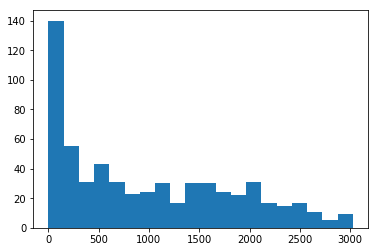

In [31]:
plt.hist(per_poss100_17_18['MP'], bins=20);

In [32]:
# would like to take players that are less than 500 minutes played out.

In [43]:
per_poss100_17_18 = per_poss100_17_18[per_poss100_17_18['MP']>500] #took out players that played less than 500min
# they were either injured or didn't play enough for my model

In [44]:
per_poss100_17_18

,2P,2P%,2PA,3P,3P%,3PA,AST,Age,BLK,DRB,DRtg,FG,FG%,FGA,FT,FT%,FTA,GS,Games,MP,ORB,ORtg,PF,PTS,STL,TOV,TRB
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,
CJ McCollum,8.1,0.465,17.5,3.2,0.397,8.1,4.6,26.0,0.6,4.6,109.0,11.4,0.443,25.6,3.6,0.836,4.3,81.0,81.0,2923.0,0.9,108.0,2.9,29.5,1.3,2.6,5.5
Damian Lillard,7.3,0.501,14.6,4.2,0.361,11.7,9.0,27.0,0.5,4.9,109.0,11.6,0.439,26.4,9.2,0.916,10.0,73.0,73.0,2670.0,1.2,120.0,2.2,36.6,1.4,3.8,6.1
Jusuf Nurkic,11.4,0.508,22.5,0.0,0.000,0.2,3.4,23.0,2.6,12.4,101.0,11.4,0.505,22.7,4.1,0.630,6.5,79.0,79.0,2088.0,4.5,102.0,5.9,27.0,1.5,4.4,16.9
Al-Farouq Aminu,2.5,0.432,5.8,3.0,0.369,8.1,2.0,27.0,1.0,10.3,104.0,5.5,0.395,14.0,1.4,0.738,1.9,67.0,69.0,2072.0,2.3,105.0,3.3,15.5,1.9,1.9,12.6
Evan Turner,5.3,0.485,10.9,1.0,0.318,3.2,4.2,29.0,0.7,5.2,109.0,6.3,0.447,14.1,2.2,0.850,2.6,40.0,79.0,2034.0,0.7,103.0,4.0,15.9,1.1,2.4,6.0
Shabazz Napier,4.6,0.450,10.1,2.7,0.376,7.1,4.9,26.0,0.5,4.7,106.0,7.2,0.420,17.2,3.8,0.841,4.5,10.0,74.0,1535.0,0.8,107.0,2.7,20.9,2.6,2.9,5.5
Pat Connaughton,3.0,0.506,6.0,2.5,0.352,7.0,3.0,25.0,0.7,4.2,110.0,5.5,0.423,13.0,1.2,0.841,1.5,5.0,82.0,1488.0,1.2,110.0,4.0,14.7,0.8,1.4,5.4
Ed Davis,5.7,0.584,9.8,0.0,0.000,0.0,1.4,28.0,1.8,13.3,103.0,5.7,0.582,9.9,2.5,0.667,3.8,0.0,78.0,1471.0,6.2,121.0,6.4,14.0,1.1,2.2,19.4
Maurice Harkless,3.9,0.547,7.0,1.9,0.415,4.6,2.1,24.0,1.7,4.6,106.0,5.8,0.495,11.7,1.7,0.712,2.3,36.0,59.0,1264.0,1.8,117.0,4.1,15.2,1.9,1.6,6.4


In [39]:
per_poss100_17_18.columns

Index(['2P', '2P%', '2PA', '3P', '3P%', '3PA', 'AST', 'Age', 'BLK', 'DRB',
       'DRtg', 'FG', 'FG%', 'FGA', 'FT', 'FT%', 'FTA', 'GS', 'Games', 'MP',
       'ORB', 'ORtg', 'PF', 'PTS', 'STL', 'TOV', 'TRB'],
      dtype='object')

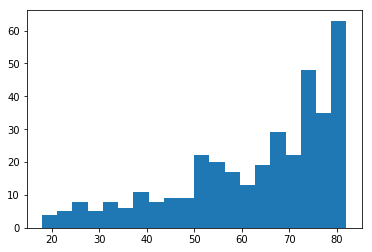

In [45]:
plt.hist(per_poss100_17_18['Games'], bins=20);

In [48]:
per_poss100_17_18 = per_poss100_17_18[per_poss100_17_18['Games']>40]# going to take out players that play less than 40 games/ looked at most
# of the players and they were mostly injured throughout the season.

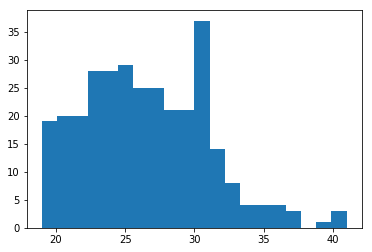

In [51]:
plt.hist(per_poss100_17_18['Age'], bins=20);
# interesting most players from 2017-2018 were from 20-30
# Age can be taken out cause age shouldn't be a factor for this model

In [55]:
# per_poss100_17_18.drop(columns='Age', inplace=True)

In [ ]:
plt.hist(per_poss100_17_18[''])